# Language Detection 
Semesterarbeit CAS **Practical Machine Learning** der Berner Fachhochschule. <br />
Q3/2020, Thomas Iten

## Initialisierung


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import HTML

# Reports
data_balance       = "ReportDataBalance"
score              = "ReportScore"
score_per_language = "ReportScorePerLanguage"
score_per_word     = "ReportScorePerWord"
score_prob         = "ReportScoreProbability"
score_prob_hits    = score_prob + "Hits"
score_prob_probs   = score_prob + "Probabilities"
system_performance = "ReportSystemPerformance"

# languages
languages = ["de", "fr", "it", "en"]

# Load reports
def load(report):
    file = "outcome/" + report + ".csv"
    return pd.read_csv(file)
    
# Display as HTML
def display_title(title):
    display(HTML('<h2>' + title + '</h2>'))

def display_data(df, sort_by='Model', show_index=False):
    display(HTML(df.sort_values(by=sort_by).to_html(index=show_index)))
    display(HTML('<br />'))
    
# Save graphics
def save(report, layout_rect=(0,0,1,1)):
    file = "graphic/" + report + ".png"
    plt.tight_layout(rect=layout_rect)
    plt.savefig(file, dpi=300)
    

## ReportDataBalance


File,AvgChars,AvgWords
articles_de_100k.csv,116.40556,16.75641
articles_en_100k.csv,118.85534,20.26543
articles_fr_100k.csv,116.93365,19.26814
articles_it_100k.csv,119.58188,19.04569


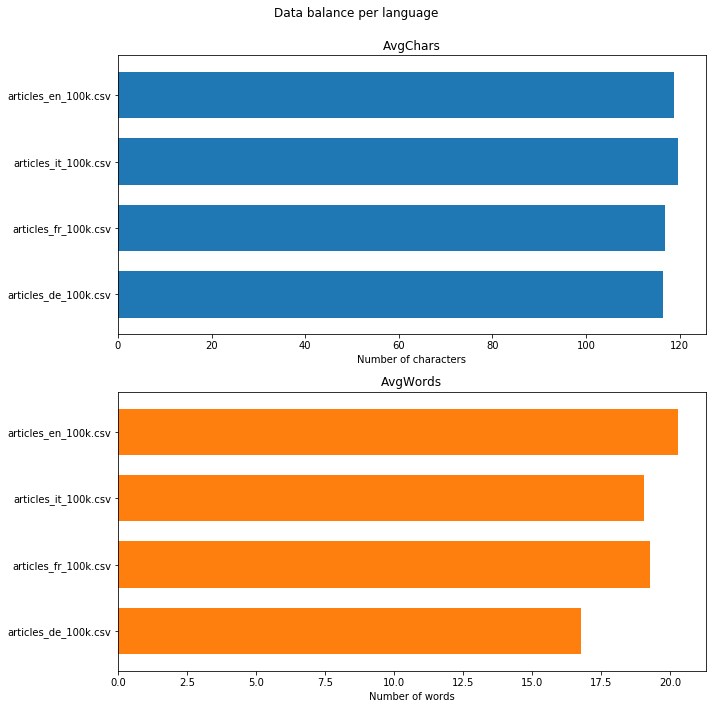

In [2]:
df = load(data_balance)

filter = []
for language in languages:
    filter.append("articles_" + language + "_100k.csv")
df = df.loc[df['File'].isin(filter)]

display_title("Testdata balance")
display_data(df, sort_by='File')

ax = df.plot(title='Data balance per language',
             kind='barh', x='File', y=['AvgChars','AvgWords'], legend=None,
             width=0.7, figsize=(10,10),
             subplots=True, sharex=False )
ax[0].set_xlabel("Number of characters")
ax[1].set_xlabel("Number of words")
ax[0].set_ylabel("")
ax[1].set_ylabel("")

save(data_balance, layout_rect=(0,0,1,0.95))

## ReportScore


Model,Score,Total,Time,Accuracy
AzureTextAnalytics,991,1000,135.20,0.991
LangDetect,986,1000,3.58,0.986
LangDetectSpacy,985,1000,10.76,0.985
LangFromChars,952,1000,57.88,0.952
LangFromStopwords,978,1000,0.09,0.978


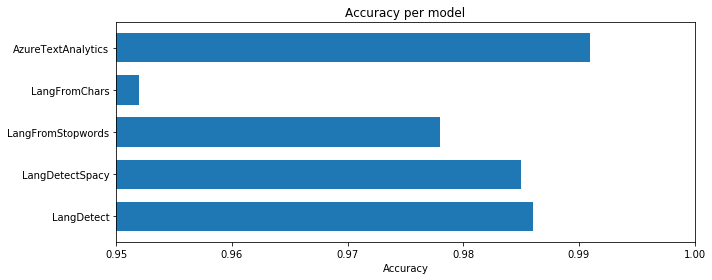

In [3]:
df = load(score)
df['Accuracy'] = df['Score'] / df['Total']

display_title("Accuracy per model")
display_data(df)

ax = df.plot(title='Accuracy per model',
             kind='barh', x='Model', y='Accuracy', legend=None,
             xticks=np.arange(0, 1.01, step=0.01), xlim=(0.95,1.0),
             width=0.7, figsize=(10,4) )
ax.set_xlabel("Accuracy")
ax.set_ylabel("")

save(score)

## ReportScorePerLanguage


Model,de,fr,it,en
AzureTextAnalytics,0.971,0.999,0.996,0.999
LangDetect,0.978,0.997,0.990,0.994
LangDetectSpacy,0.972,0.997,0.991,0.992
LangFromChars,0.903,0.987,0.973,1.000
LangFromStopwords,0.977,0.999,0.936,0.994


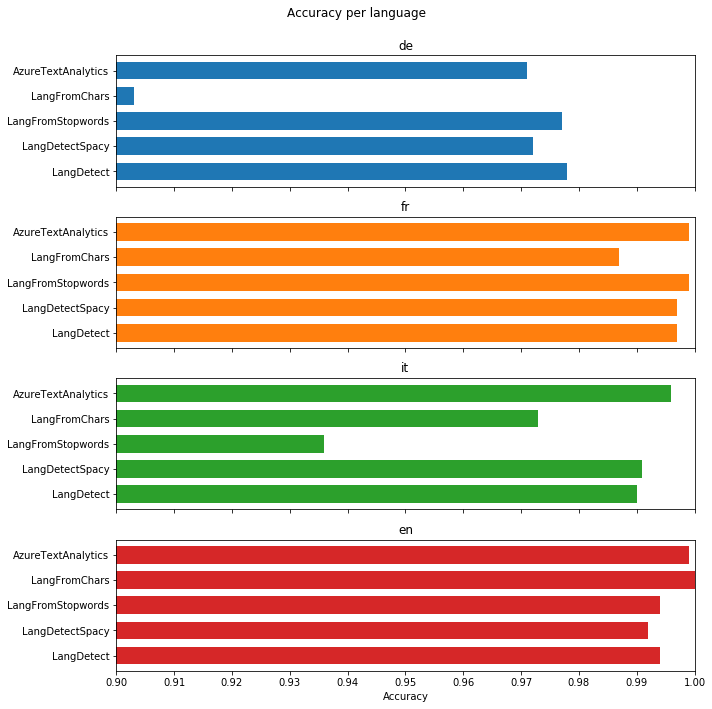

In [4]:
df = load(score_per_language)

display_title("Accuracy per language")
display_data(df)

ax = df.plot(title='Accuracy per language',
             kind='barh', x='Model', y=['de','fr','it','en'], legend=None,
             xticks=np.arange(0, 1.01, step=0.01), xlim=(0.90,1.0),
             width=0.7, figsize=(10,10),
             subplots=True, sharex=True )
for i in range(0,4):
    ax[i].set_xlabel("Accuracy")
    ax[i].set_ylabel("")

save(score_per_language, layout_rect=(0,0,1,0.95))


## ReportScorePerWord


Model,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
AzureTextAnalytics,0.566,0.754,0.847,0.888,0.927,0.941,0.949,0.961,0.964,0.969,0.973,0.979,0.982,0.985,0.985,0.986,0.987,0.987,0.988,0.990
LangDetect,0.339,0.525,0.664,0.757,0.818,0.855,0.878,0.909,0.931,0.940,0.948,0.964,0.969,0.972,0.974,0.981,0.983,0.986,0.984,0.985
LangDetectSpacy,0.344,0.531,0.665,0.748,0.817,0.854,0.881,0.906,0.928,0.940,0.953,0.957,0.968,0.972,0.974,0.980,0.984,0.984,0.985,0.984
LangFromChars,0.391,0.538,0.692,0.768,0.818,0.846,0.860,0.877,0.889,0.899,0.910,0.919,0.926,0.930,0.937,0.945,0.945,0.949,0.947,0.948
LangFromStopwords,0.308,0.505,0.625,0.704,0.763,0.816,0.855,0.884,0.895,0.904,0.917,0.934,0.951,0.963,0.968,0.970,0.973,0.981,0.981,0.981


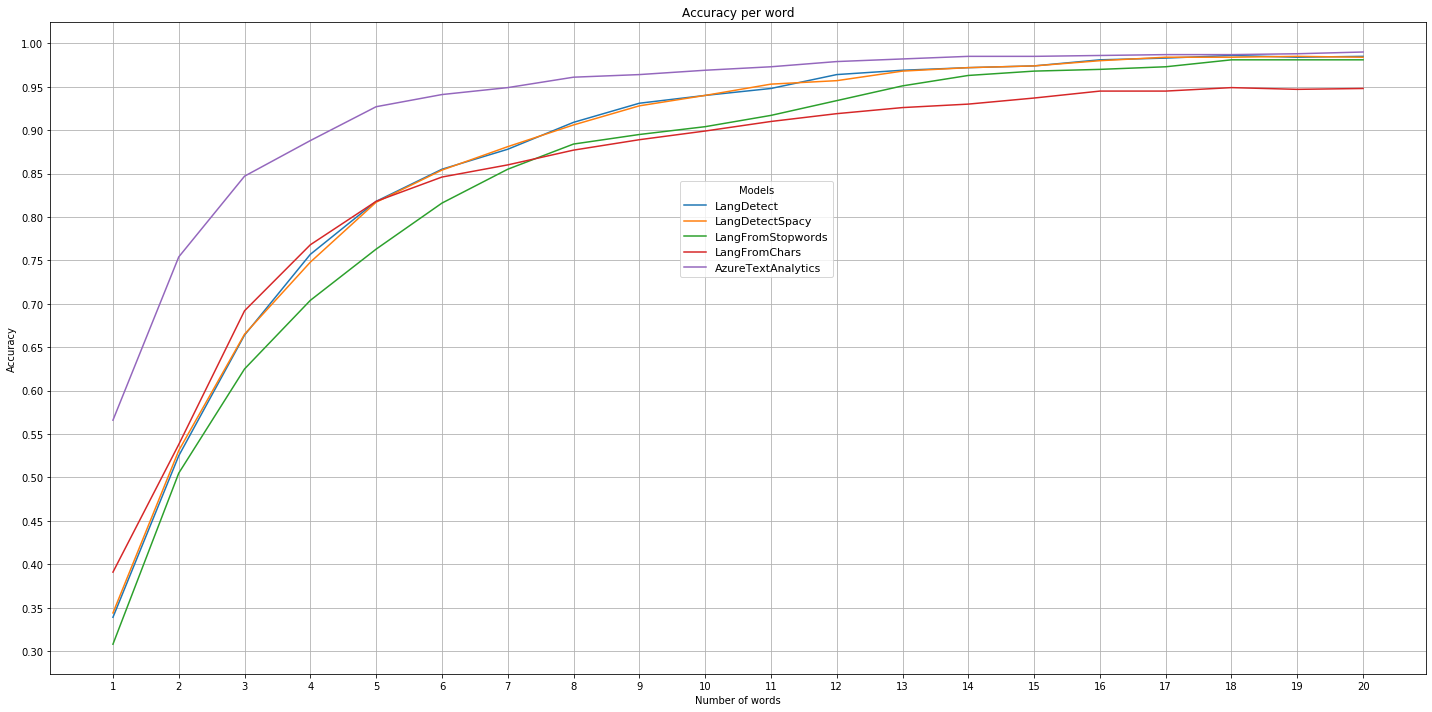

In [5]:
df = load(score_per_word)
models = df['Model'].tolist()

dft = df.T
data = dft[1:]

display_title("Accuracy per word")
display_data(df)

ax = data.plot(title='Accuracy per word',
             kind='line', grid=True,
             xticks=np.arange(0,20, step=1.0),
             yticks=np.arange(0.3, 1.01, step=0.05),
             figsize=(20,10)
              )
ax.set_xlabel("Number of words")
ax.set_ylabel("Accuracy")
ax.legend(models, title="Models", bbox_to_anchor=(0.573, 0.765), fontsize=11)

save(score_per_word)


## ReportScoreProbability Overview

Model,Hits,Fails,AvgHits,AvgFails
AzureTextAnalytics,991,9,0.975134,0.943223
LangDetect,985,15,0.995936,0.752351
LangDetectSpacy,986,14,0.994201,0.744895
LangFromChars,951,49,0.963172,0.818737
LangFromStopwords,979,21,0.678359,0.372344


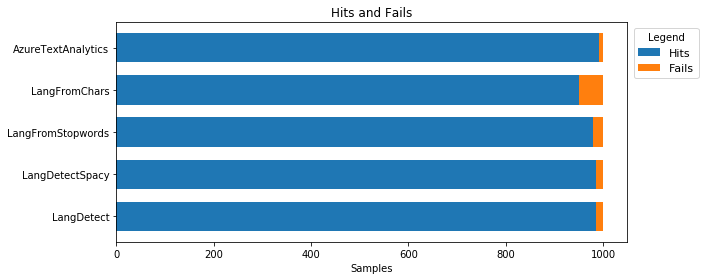

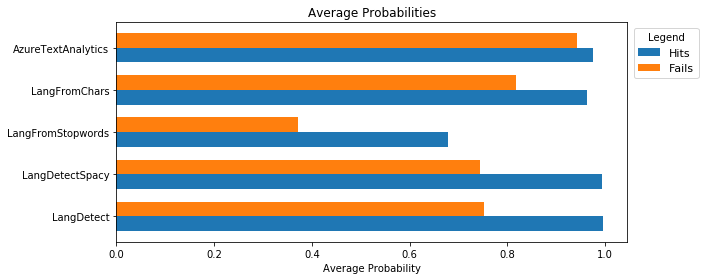

In [6]:
df_probs = load(score_prob_probs)
df_hits = load(score_prob_hits)

df = pd.DataFrame(columns=['Model', 'Hits', 'Fails', 'AvgHits', 'AvgFails'])
for i in range(0,5):
    model = df_probs.iat[i,0]
    hits = 0
    fails = 0
    sum_hits = 0
    sum_fails = 0
    for j in range(1, 1001):
        is_hit = df_hits.iat[i,j]
        value  = df_probs.iat[i,j]
        if is_hit:
            hits = hits + 1
            sum_hits = sum_hits + value
        else:
            fails = fails + 1
            sum_fails = sum_fails + value
    avg_hits = sum_hits/hits
    avg_fails= sum_fails/fails
    df.loc[i] = [model, hits, fails, avg_hits, avg_fails]

display_title("Score Probabilities Overview")
display_data(df)

# Hits and Fails
ax = df.plot(title='Hits and Fails',
             kind='barh', x='Model', y=['Hits','Fails'],
             width=0.7, figsize=(10,4), stacked=True )

ax.set_xlabel("Samples")
ax.set_ylabel("")
ax.legend(['Hits','Fails'], title="Legend", bbox_to_anchor=(1.15, 1), fontsize=11)

save(score_prob + "HitsAndFails")

# Average Probabilities
ax = df.plot(title='Average Probabilities',
             kind='barh', x='Model', y=['AvgHits','AvgFails'],
             width=0.7, figsize=(10,4) )

ax.set_xlabel("Average Probability")
ax.set_ylabel("")
ax.legend(['Hits','Fails'], title="Legend", bbox_to_anchor=(1.15, 1), fontsize=11)

save(score_prob + "AverageProbability")


## ReportScoreProbability Lineplot

Model,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
AzureTextAnalytics,0.882353,1.000000,1.000000,1.000000,0.937500,1.000000,1.000000,0.875000,0.857143,1.00

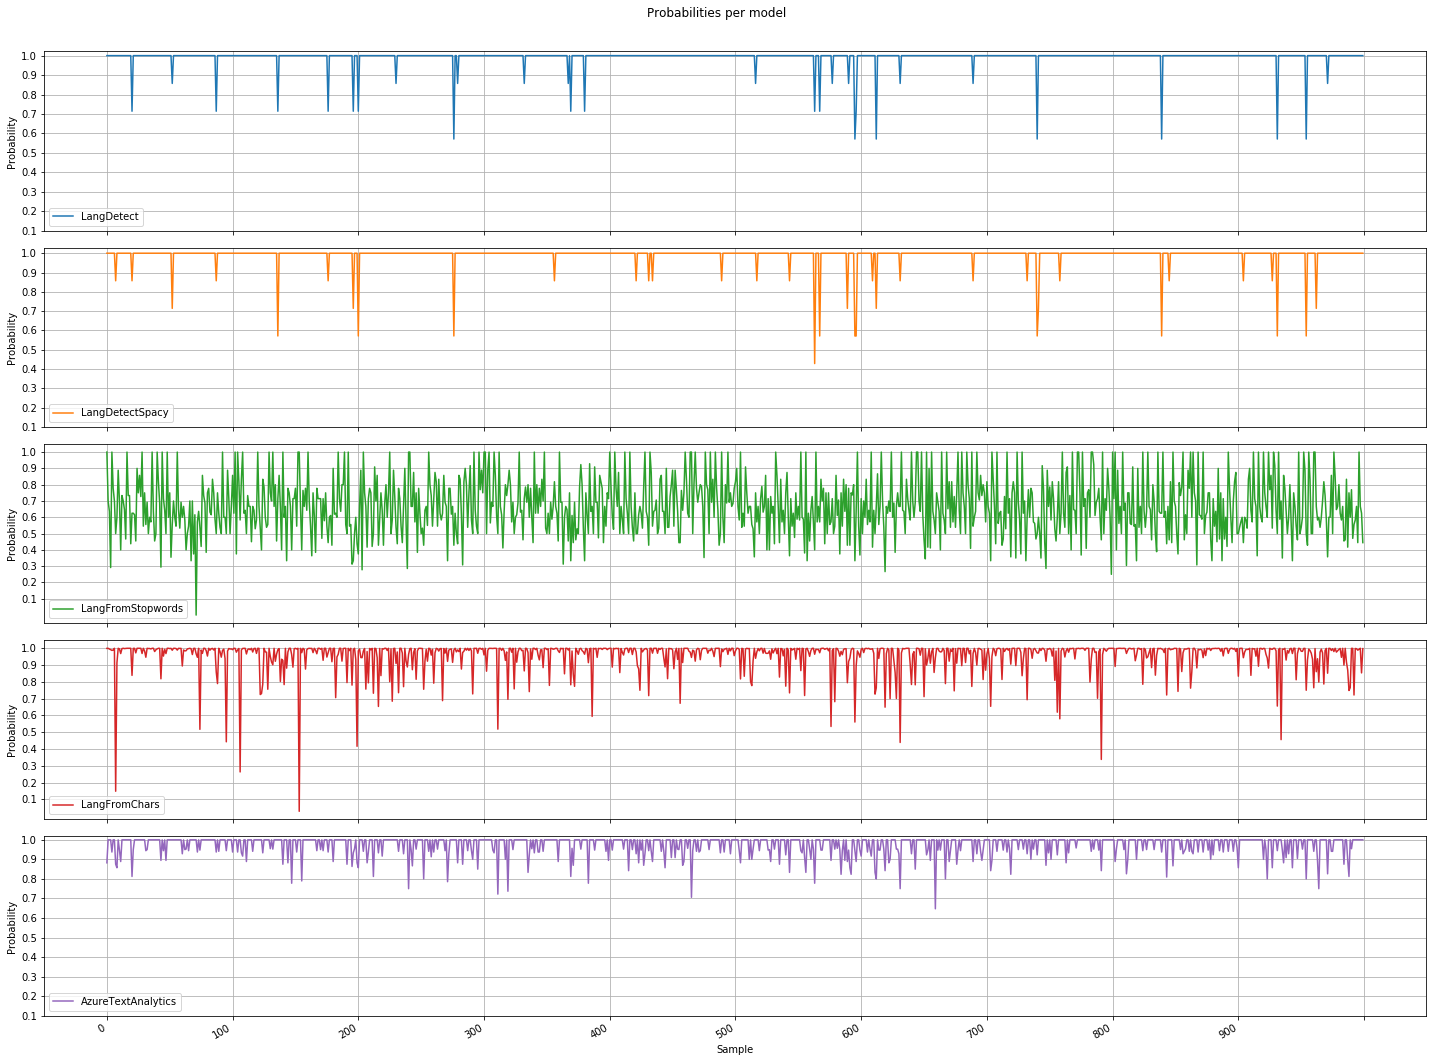

In [7]:
df = load(score_prob_probs)

display_title("Score Probabilities Lineplot")
display_data(df)

models = df['Model'].tolist()
data = df.T[1:]
data.columns = models

ax = data.plot(title='Probabilities per model',
             kind='line', grid=True, 
             xticks=np.arange(0,1001, step=100),
             yticks=np.arange(0.1, 1.01, step=0.1),
             figsize=(20,15),
             subplots=True )
for i in range(0,5):
    ax[i].set_xlabel("Sample")
    ax[i].set_ylabel("Probability")

save(score_prob + "Lineplot", layout_rect=(0,0,1,0.95))


## ReportScoreProbability Boxplot

Model,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
AzureTextAnalytics,0.882353,1.000000,1.000000,1.000000,0.937500,1.000000,1.000000,0.875000,0.857143,1.00

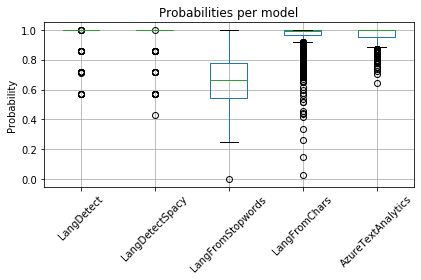

In [8]:
df = load(score_prob_probs)

display_title("Score Probabilities Boxplot")
display_data(df)

models = df['Model'].tolist()
boxplot_df = df.drop(['Model'], axis=1)
boxplot_dict = {}
for i in range(0, len(models)):
    boxplot_dict[models[i]] = boxplot_df.iloc[i,]

data = pd.DataFrame(boxplot_dict, columns = models)

ax = data.boxplot(rot=45)
ax.set_title("Probabilities per model")
ax.set_ylabel("Probability")

save(score_prob + "Boxplot")


## ReportSystemPerformance

Model,Time,CPU,Memory Peak,Memory Peak MB
AzureTextAnalytics,146.70,1.18,594964,0.594964
LangDetect,4.31,8.33,499253,0.499253
LangDetectSpacy,12.83,8.33,1336925,1.336925
LangFromChars,65.28,17.18,282294433,282.294433
LangFromStopwords,0.10,8.31,495957,0.495957


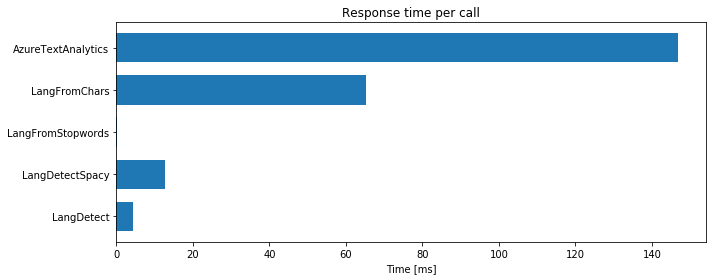

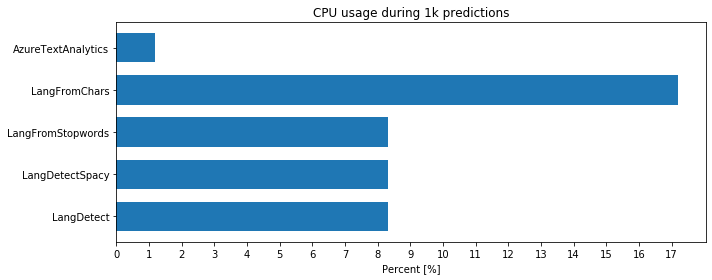

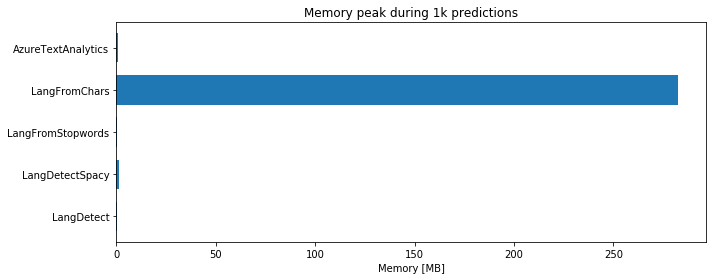

In [9]:
df = load(system_performance)
df['Memory Peak MB'] = df['Memory Peak'] / (10**6)

display_title("System Performance")
display_data(df)

# Response time per call
ax = df.plot(title='Response time per call',
             kind='barh', x='Model', y='Time', legend=None,
             width=0.7, figsize=(10,4) )
ax.set_xlabel("Time [ms]")
ax.set_ylabel("")

save(system_performance + "Time")

# Response time per call
ax = df.plot(title='CPU usage during 1k predictions',
             kind='barh', x='Model', y='CPU', legend=None,
             xticks=np.arange(0,18, step=1.0),
             width=0.7, figsize=(10,4) )
ax.set_xlabel("Percent [%]")
ax.set_ylabel("")

save(system_performance + "CPU")

# Response time per call
ax = df.plot(title='Memory peak during 1k predictions',
             kind='barh', x='Model', y='Memory Peak MB', legend=None,
             width=0.7, figsize=(10,4) )
ax.set_xlabel("Memory [MB]")
ax.set_ylabel("")

save(system_performance + "Memory")

_The end._